<a href="https://colab.research.google.com/github/htapiagroup/oscilaciones-de-masas-acopladas-por-resortes-ManuelD22/blob/master/Masas_Acopladas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\begin{eqnarray}
H&=&\frac{1}{2m}P_1^2+\frac{1}{2m}P_2^2+\frac{1}{2}k_1x_1^2+\frac{1}{2}k_2(x_2-x_1)^2+\frac{1}{2}k_3x_2^2 \\
\dot{P_1}&=&-\frac{\partial H}{\partial x_1}=-k_1x_1+k_2(x_2-X_1) \\
\dot{P_2}&=&-\frac{\partial H}{\partial x_2}=-k_3x_2-k_2(x_2-X_1) \\
\dot{x_1}&=&\frac{\partial H}{\partial P_1}=\frac{P_1}{m_1} \\
\dot{x_2}&=&\frac{\partial H}{\partial P_2}=\frac{P_2}{m_1}
\end{eqnarray}

In [0]:
import numpy as np
import time

In [0]:
k1=1.0
k2=1.0
k3=1.0
m1=1.0
m2=1.0
L=1.5
def Q_Dot(y):
  """Regresa la derivada del vector Q"""
  x1,x2=y[0],y[1]
  p1,p2=y[2],y[3]
  x1_dot=p1/m1
  x2_dot=p2/m2
  p1_dot=-k1*x1+k2*(x2-x1)
  p2_dot=-k3*x2-k2*(x2-x1)
  return np.asarray([x1_dot,x2_dot,p1_dot,p2_dot])

In [0]:
def paso_euler(f,t_n,y_n,dt):
  """Toma un paso usando el metodo de Euler
  y_n = valor actual del vector al tiempo t=t_n
  f = funcion que calcula la derivada de y(t)
  """
  y_dot=f(t_n, y_n)
  y_n_mas_1=y_n+dt*y_dot
  return y_n_mas_1

In [0]:
def integrador_simple(f,t,y_0,dt):
  """Calcula la trayectoria de valores de y usando el metodo de
  Euler con pasos constantes
  f = funcion que calcula la derivada de y(t), f(t,y)
  y_0 = valor inicial de y y_0=[y0_0,y1_0,...]
  t = lista con el intervalo[t_0, t_f]
  dt = distancia entre pasos de tiempo"""
  tiempo=time.time()

  t_0,t_f=t
  n=int((t_f-t_0)/dt)
  d=len(y_0)
  y_tray=np.zeros(((n+1),d))
  t=np.linspace(t_0,t_f,n+1)
  y_tray[0,:]=y_0
  tiempo=time.time()-tiempo
  for i in range(n):
    y_tray[i+1,:]=paso_euler(f,t[i],y_tray[i,:],dt)
  print ("constantes de resortes: k1= " + str(k1) + "k2= " + str(k2) + "k3= " + str(k3))
  print ("masas: m1= " + str(m1) + "m2= " + str(m2))
  print("El tiempo de computo es = " + ("%.5f" %tiempo) + "s")
  return t, y_tray

In [0]:
def Q_Dot_t(t,y):
  return Q_Dot(y)

Para uno de sus modos normales de oscilacion (masas equidistantes al punto de equilibrio)

constantes de resortes: k1= 1.0k2= 1.0k3= 1.0
masas: m1= 1.0m2= 1.0
El tiempo de computo es = 0.00161s


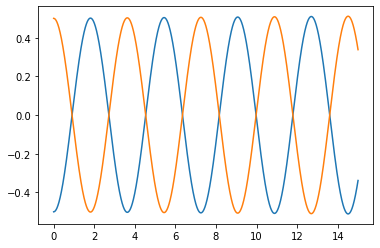

In [130]:
import matplotlib.pyplot as plt
t,Q_Traj=integrador_simple(Q_Dot_t, [0,15],[-0.5,0.5,0,0],0.001)
plt.plot(t,Q_Traj[:,0]);
plt.plot(t,Q_Traj[:,1]);

Para su otro modo normal de oscilacion (ambas masas en la misma posicion)

constantes de resortes: k1= 1.0k2= 1.0k3= 1.0
masas: m1= 1.0m2= 1.0
El tiempo de computo es = 0.00187s


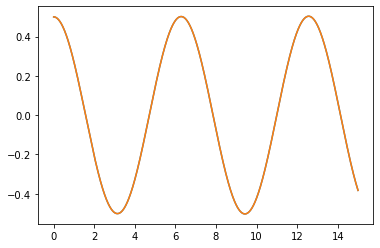

In [131]:
import matplotlib.pyplot as plt
t,Q_Traj=integrador_simple(Q_Dot_t, [0,15],[0.5,0.5,0,0],0.001)
plt.plot(t,Q_Traj[:,0]);
plt.plot(t,Q_Traj[:,1]);

## Variando condiciones iniciales

constantes de resortes: k1= 1.0k2= 1.0k3= 1.0
masas: m1= 1.0m2= 1.0
El tiempo de computo es = 0.00059s


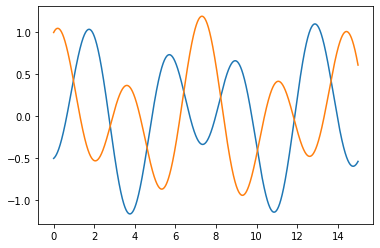

In [132]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[-0.5,1,0.2,0.5],0.001)
plt.plot(t, Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

## Variando parametros

In [0]:
k1=0.2
k2=0.4
k3=0.6
m1=0.8
m2=1


constantes de resortes: k1= 0.2k2= 0.4k3= 0.6
masas: m1= 0.8m2= 1
El tiempo de computo es = 0.00144s


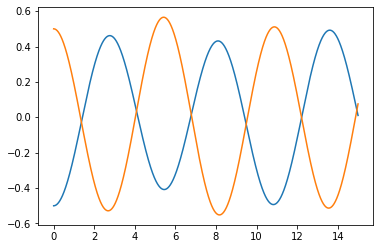

In [134]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[-0.5,0.5,0.,0.],0.001)
plt.plot(t, Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

## Variando condiciones iniciales y parametros

In [0]:
k1=0.5
k2=0.8
k3=0.6
m1=0.4
m2=0.2


constantes de resortes: k1= 0.5k2= 0.8k3= 0.6
masas: m1= 0.4m2= 0.2
El tiempo de computo es = 0.00087s


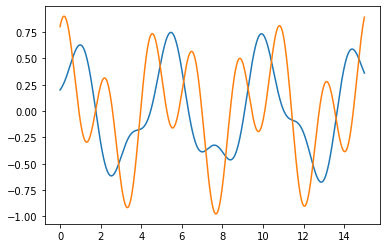

In [136]:
t, Q_Traj = integrador_simple(Q_Dot_t,[0,15],[0.2,0.8,0.1,0.2],0.001)
plt.plot(t, Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

 # Energia del sistema

In [0]:
def Q_Dot(y):
  """Regresa la derivada del vector Q"""
  x1,x2=y[0],y[1]
  p1,p2=y[2],y[3]
  x1_dot=p1/m1
  x2_dot=p2/m2
  p1_dot=-k1*x1+k2*(x2-x1)
  p2_dot=-k3*x2-k2*(x2-x1)
  return np.asarray([x1_dot,x2_dot,p1_dot,p2_dot])

def paso_euler(f,t_n,y_n,dt):
  """Toma un paso usando el metodo de Euler
  y_n = valor actual del vector al tiempo t=t_n
  f = funcion que calcula la derivada de y(t)
  """
  y_dot=f(t_n, y_n)
  y_n_mas_1=y_n+dt*y_dot
  return y_n_mas_1

def Q_Dot_t(t,y):
  return Q_Dot(y)

def integrador_simple(f,t,y_0,dt):
  """Calcula la trayectoria de valores de y usando el metodo de
  Euler con pasos constantes
  f = funcion que calcula la derivada de y(t), f(t,y)
  y_0 = valor inicial de y y_0=[y0_0,y1_0,...]
  t = lista con el intervalo[t_0, t_f]
  dt = distancia entre pasos de tiempo"""
  tiempo=time.time()

  t_0,t_f=t
  n=int((t_f-t_0)/dt)
  d=len(y_0)
  y_tray=np.zeros(((n+1),d))
  U=np.zeros((n+1))
  T=np.zeros((n+1))
  H=np.zeros((n+1))
  t=np.linspace(t_0,t_f,n+1)
  y_tray[0,:]=y_0
  U[0]=1/2*k1*y_0[0]**2+1/2*k3*y_0[1]**2+1/2*k2*(y_0[1]-y_0[0])**2
  T[0]=(1/(2*m1))*(y_0[2])**2+(1/(2*m2))*(y_0[3])**2
  H[0]=U[0]+T[0]
  tiempo=time.time()-tiempo
  for i in range(n):
    y_tray[i+1,:]=paso_euler(f,t[i],y_tray[i,:],dt)
    U[i+1]=1/2*k1*y_tray[i+1,0]**2+1/2*k3*y_tray[i+1,1]**2+1/2*k2*(y_tray[i+1,1]-y_tray[i+1,0])**2
    T[i+1]=(1/(2*m1))*(y_tray[i+1,2])**2+(1/(2*m2))*(y_tray[i+1,3])**2
    H[i+1]=U[i+1]+T[i+1]
    
  print ("constantes de resortes: k1= " + str(k1) + "k2= " + str(k2) + "k3= " + str(k3))
  print ("masas: m1= " + str(m1) + "m2= " + str(m2))
  print("El tiempo de computo es = " + ("%.5f" %tiempo) + "s")

  return t, y_tray, H,T,U
  

constantes de resortes: k1= 1k2= 1k3= 1
masas: m1= 1m2= 1
El tiempo de computo es = 0.00945s


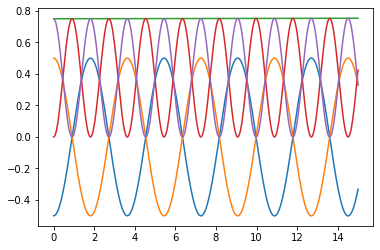

In [138]:
k1=1
k2 = 1
k3 = 1
m1 = 1
m2 = 1

t, Q_Traj, H,T,U = integrador_simple(Q_Dot_t,[0,15],[-0.5,0.5,0.0,-0.0],0.0001)
plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])
plt.plot(t,H)
plt.plot(t,T)
plt.plot(t,U)

## n masas acopladas

\begin{eqnarray}
H &=& \frac{1}{2m}p_1^2 + \ldots + \frac{1}{2m}p_n^2 +\frac{1}{2}k_1x_1^2 + \ldots + \frac{1}{2} k_i (x_i - x_{i-1})^2 + \ldots + \frac{1}{2}k_nx_n^2 \\
H &=& \sum_{i=1}^N \frac{p_i^2}{2m} + \sum_{i=0}^N\frac{k}{2}(x_{i+1}-x_i) \\
\dot{x}_i & =& \frac{\partial H}{\partial p_i} = \frac{p_i}{m} \\
\dot{p}_i & =& - \frac{\partial H}{\partial x_i} = k(x_{i+1}-2x_i+2x_{i-1})
\end{eqnarray}


Realizaremos el caso en donde las k y m son iguales

In [0]:
m = 1.0
k = 1.0
def Q_Dot(y):
  n=int(len(y)/2)
  X = []
  P = []
  Xdot = []
  Pdot = []
  for i in range (int(n)):
    X.append(float(y[i]))
  for j in range (int(n),2*int(n)):
    P.append(float(y[j]))
  for l in range (int(n)):
    Xdot.append(float(P[l]/m))
  for s in range (int(n)):
    X.append(0) 
    Pdot.append(k*(X[s+1]-2*X[s]+X[s-1]))
    X.pop(n) 
  Xdot.extend(Pdot) 
  return np.asarray(Xdot)


In [0]:
def paso_euler(f,t_n,y_n,dt):
  """Toma un paso usando el metodo de Euler
  y_n = valor actual del vector al tiempo t=t_n
  f = funcion que calcula la derivada de y(t)
  """
  y_dot=f(t_n, y_n)
  y_n_mas_1=y_n+dt*y_dot
  return y_n_mas_1

def Q_Dot_t(t,y):
  return Q_Dot(y)

def integrador_simple(f,t,y_0,dt):
  """Calcula la trayectoria de valores de y usando el metodo de
  Euler con pasos constantes
  f = funcion que calcula la derivada de y(t), f(t,y)
  y_0 = valor inicial de y y_0=[y0_0,y1_0,...]
  t = lista con el intervalo[t_0, t_f]
  dt = distancia entre pasos de tiempo"""
  tiempo=time.time()
  t_0,t_f=t
  n=int((t_f-t_0)/dt)
  d=len(y_0)
  y_tray=np.zeros(((n+1),d))
  t=np.linspace(t_0,t_f,n+1)
  y_tray[0,:]=y_0
  tiempo=time.time()-tiempo
  
  for i in range(n):
    y_tray[i+1,:]=paso_euler(f,t[i],y_tray[i,:],dt)

    
  
  print("El tiempo de computo es = " + ("%.5f" %tiempo) + "s")

  return t, y_tray

  print("introduce el vector y con las posiciones de las particulas y despues sus momentos")

El tiempo de computo es = 0.00155s


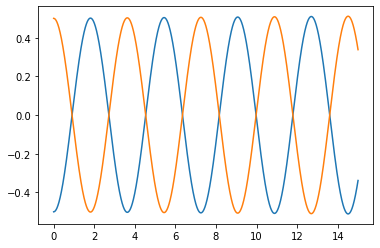

In [142]:
t, Q_Traj= integrador_simple(Q_Dot_t,[0,15],[-0.5,0.5,0,0],0.001)
plt.plot(t,Q_Traj[:,0])
plt.plot(t,Q_Traj[:,1])

Vemos que coincide con el caso realizado anteriormente

In [0]:
t,Q_Traj=integrador_simple(Q_Dot_t,[0,15],[-0.5,-0.1,0.1,0.5,.2,.1,.3,.4],0.001)
for i in range(4):
  plt.plot(t,Q_Traj[:,i])